# Do people perform worse with a time limit? 
## We study this we study this question in great detail.
We will first run a hypothesis t-test for difference in mean score (proportion correct), 
and then we will run a t-slope test for time taken, and proportion correct

In [41]:
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

First, we will import our dataset

In [42]:
data <- read.csv("data.csv", quote="")
dim(data)

[1] 103   6

we also have outliers, so we also have a separate dataset, where we filtered those out.

In [43]:
data_no_outliers <- read.csv("datanooutliers.csv", quote="")
dim(data_no_outliers)

[1] 98  6

Then, lets split into our two treatments:

In [44]:
timed <- subset(data, treatment == "timed")
untimed <- subset(data, treatment == "untimed")

timed_no <- subset(data_no_outliers, treatment == "timed")
untimed_no <- subset(data_no_outliers, treatment == "untimed") 

In [45]:
summary(timed["proportion"])
summary(untimed["proportion"])

   proportion     
 Min.   :0.06667  
 1st Qu.:0.92821  
 Median :0.96721  
 Mean   :0.91365  
 3rd Qu.:0.98610  
 Max.   :1.00000  

   proportion    
 Min.   :0.2639  
 1st Qu.:0.9467  
 Median :0.9733  
 Mean   :0.9500  
 3rd Qu.:1.0000  
 Max.   :1.0000  

### Difference in mean score

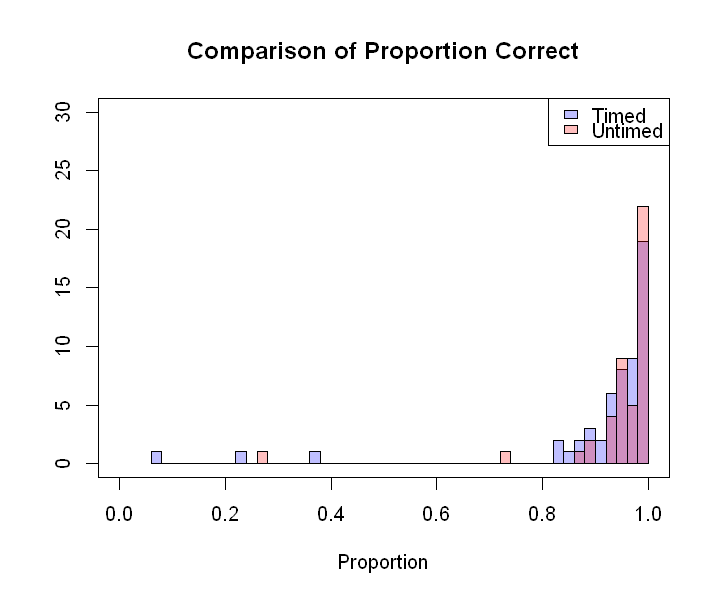

In [57]:
set_plot_dimensions(6, 5)
plot(1, type = "n", xlim = c(0, 1), ylim = c(0, 30), ylab = "", xlab = "Proportion",
     main = "Comparison of Proportion Correct")

# axis(side=1, at=seq(0, 1, by=.01))


hist(timed$proportion, xlim = c(0, 1), ylim = c(0, 10), col = rgb(0,0,1,1/4), add = TRUE, breaks = 50)
hist(untimed$proportion, xlim = c(0, 1), ylim = c(0, 10), col = rgb(1,0,0,1/4), add = TRUE, breaks = 50)


# Create a vector of labels for the legend
labels <- c("Timed", "Untimed")

#same for the colors
colors <- c(rgb(0,0,1,1/4), rgb(1,0,0,1/4))

# Add legend
legend("topright", legend = labels, fill = colors)


In [47]:
result <- t.test(untimed["proportion"], timed["proportion"], alternative= "g")

# Print the results
print(result)


	Welch Two Sample t-test

data:  untimed["proportion"] and timed["proportion"]
t = 1.2447, df = 94.019, p-value = 0.1082
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.01215137         Inf
sample estimates:
mean of x mean of y 
0.9499602 0.9136521 



### Difference in mean score but without outliers

In [48]:
result_no <- t.test(untimed_no["proportion"], timed_no["proportion"], alternative= "g", conf.level=.95)

# Print the results
print(result_no)


	Welch Two Sample t-test

data:  untimed_no["proportion"] and timed_no["proportion"]
t = 1.5917, df = 82.077, p-value = 0.05764
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.0010483        Inf
sample estimates:
mean of x mean of y 
0.9655527 0.9423433 



### T-slope test
For those who took th test untimed, is there a relationship with the time they took, and the proportion they got correct?

R has no t-slope test built in, but we can get the values doing basic linear regression

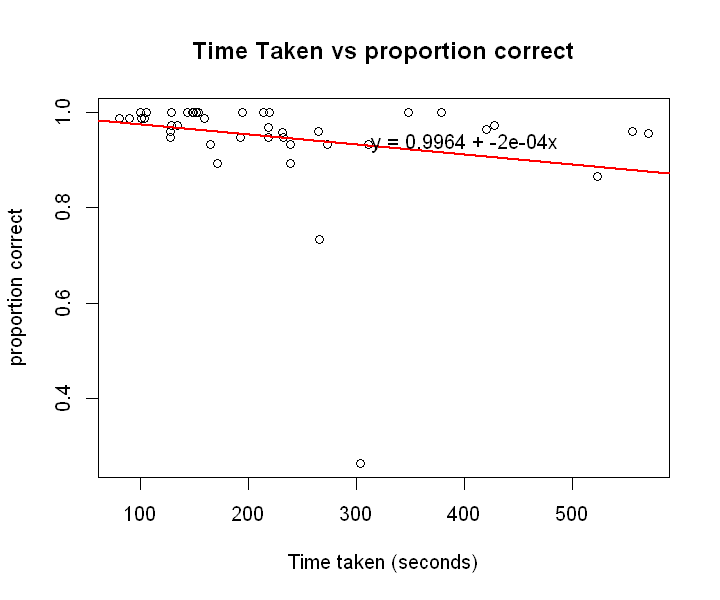

In [49]:
model <- lm(proportion~et, data = untimed)
plot(untimed$et, untimed$proportion, main = "Time Taken vs proportion correct", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model)[1], 4), " + ", round(coef(model)[2], 4), "x")
text(400, .9, eq, pos = 3, offset = 0.5)

In [50]:
summary(model)


Call:
lm(formula = proportion ~ et, data = untimed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66869 -0.00376  0.01923  0.03551  0.08317 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.99641    0.03529   28.23   <2e-16 ***
et          -0.00021    0.00014   -1.50    0.141    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1136 on 43 degrees of freedom
Multiple R-squared:  0.04973,	Adjusted R-squared:  0.02763 
F-statistic:  2.25 on 1 and 43 DF,  p-value: 0.1409


Our t-stat slope statistic can be found here:

In [51]:
print(paste("T-Statistic",coef(summary(model))["et", "t value"]))
print(paste("P-Val",coef(summary(model))["et", "Pr(>|t|)"]))

[1] "T-Statistic -1.5000375789375"
[1] "P-Val 0.140911883294628"


### T slope test without outliers

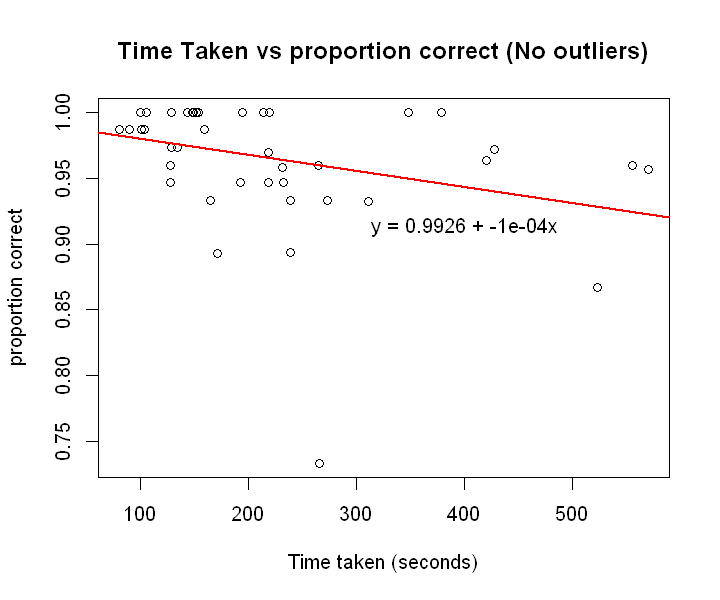

In [52]:
model_no <- lm(proportion~et, data = untimed_no)
plot(untimed_no$et, untimed_no$proportion, main = "Time Taken vs proportion correct (No outliers)", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model_no, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model_no)[1], 4), " + ", round(coef(model_no)[2], 4), "x")
text(400, .9, eq, pos = 3, offset = 0.5)


In [53]:
summary(model_no)
print(paste("T-Statistic",coef(summary(model_no))["et", "t value"]))
print(paste("P-Val",coef(summary(model_no))["et", "Pr(>|t|)"]))


Call:
lm(formula = proportion ~ et, data = untimed_no)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22648 -0.01764  0.01036  0.02588  0.05410 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.926e-01  1.460e-02  67.975   <2e-16 ***
et          -1.231e-04  5.821e-05  -2.115   0.0404 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04699 on 42 degrees of freedom
Multiple R-squared:  0.09624,	Adjusted R-squared:  0.07472 
F-statistic: 4.472 on 1 and 42 DF,  p-value: 0.04042


[1] "T-Statistic -2.11481556229248"
[1] "P-Val 0.0404212754760079"
